   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies: 0.020591871520332317
Glucose: 0.005920272947659854
BloodPressure: -0.002331879002444006
SkinThickness: 0.00015451979194520819
Insulin: -0.00018053451356796896
BMI: 0.01324403148324191
DiabetesPedigreeFunction: 0.1472374386327518
Age: 0.002621393798269235
Intercept: -0.8538942664855473


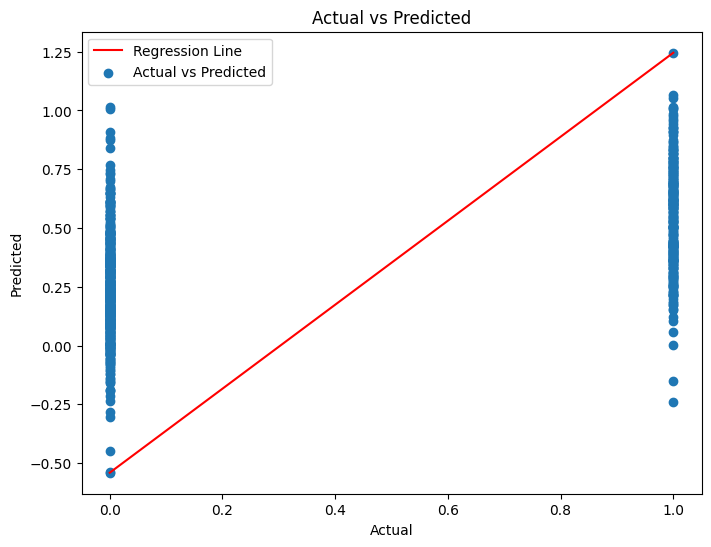

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder  # Add this line
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
# Prikaz prvih nekoliko redova sa novom kolonom
print(data.head())

# Create DataFrame
df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Instantiate the model
regression = LinearRegression()

# Fit the model
regression.fit(X, y)

# Coefficients
coefficients = regression.coef_ #w0
intercept = regression.intercept_ #w1

# Print coefficients
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

# Print intercept
print(f'Intercept: {intercept}')

# Predict
y_pred = regression.predict(X)


# Plot
plt.figure(figsize=(8, 6))

# Plotting the regression line
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], '-r', label='Regression Line')

# Scatter plot
plt.scatter(y, y_pred, label='Actual vs Predicted')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Adding legend
plt.legend()

plt.show()

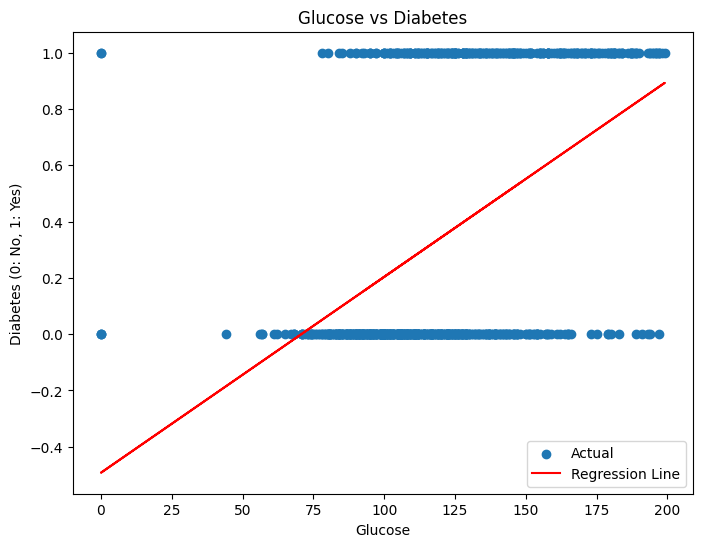

In [27]:
#predikcija za samo jednu promenljivu age
# Koristimo samo jednu kolonu za predikciju
X = df[['Glucose']]

# Ponovo instanciramo model
regression = LinearRegression()

# Ponovo fitujemo model
regression.fit(X, y)

# Predviđanja
y_pred = regression.predict(X)

# Plot
plt.figure(figsize=(8, 6))#Ova postavka označava da će figura biti široka 8 inča i visoka 6 inča.

# Scatter plot
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')

plt.xlabel('Glucose')
plt.ylabel('Diabetes (0: No, 1: Yes)')
plt.title('Glucose vs Diabetes')

plt.legend()
plt.show()


/tmp/ipykernel_33/3864053638.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  classes = [row[-1] for row in neighbors]  # Poslednja kolona predstavlja ciljnu promenljivu 'Outcome'


Vrednost predikcije: 0.0
Novi podatak [1, 93, 71, 31, 0, 33.4, 0.315, 23] pripada klasi: 0.0


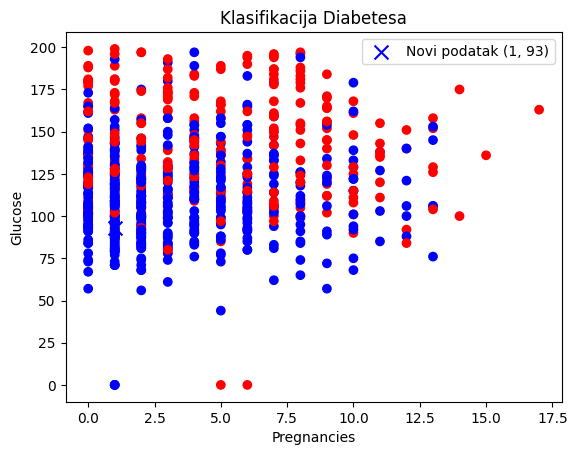

In [34]:
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

# Učitavanje podataka
data = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')

# Novi podatak za klasifikaciju
new_data = [1, 93, 71, 31, 0, 33.4, 0.315, 23]

# Određivanje vrednosti za K
K = int(sqrt(len(data)))

# Funkcija za izračunavanje euklidske udaljenosti između dva podatka
def euclidean_distance(first, second):
    return sqrt(sum((a - b) ** 2 for a, b in zip(first, second[:-1])))

# Funkcija za pronalaženje K najbližih suseda
def get_neighbors(data, new_data, k):
    distances = [(row, euclidean_distance(new_data, row)) for _, row in data.iterrows()]
    distances.sort(key=lambda x: x[1])
    neighbors = [row for row, _ in distances[:k]]
    return neighbors

# Funkcija za predikciju klase novog podatka
def predict_classification(data, new_data, k):
    neighbors = get_neighbors(data, new_data, k)
    classes = [row[-1] for row in neighbors]  # Poslednja kolona predstavlja ciljnu promenljivu 'Outcome'
    prediction = max(set(classes), key=classes.count)
    print(f"Vrednost predikcije: {prediction}")
    return prediction

# Prikaz rezultata
prediction = predict_classification(data, new_data, K)
print(f"Novi podatak {new_data} pripada klasi: {prediction}")

# Prikazivanje podataka i novog podatka na grafiku
colors = {1: 'red', 0: 'blue'}
plt.scatter(data['Pregnancies'], data['Glucose'], c=data['Outcome'].map(colors))
plt.scatter(new_data[0], new_data[1], c=colors[prediction], marker='x', s=100, label=f'Novi podatak ({new_data[0]}, {new_data[1]})')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title('Klasifikacija Diabetesa')
plt.legend()
plt.show()


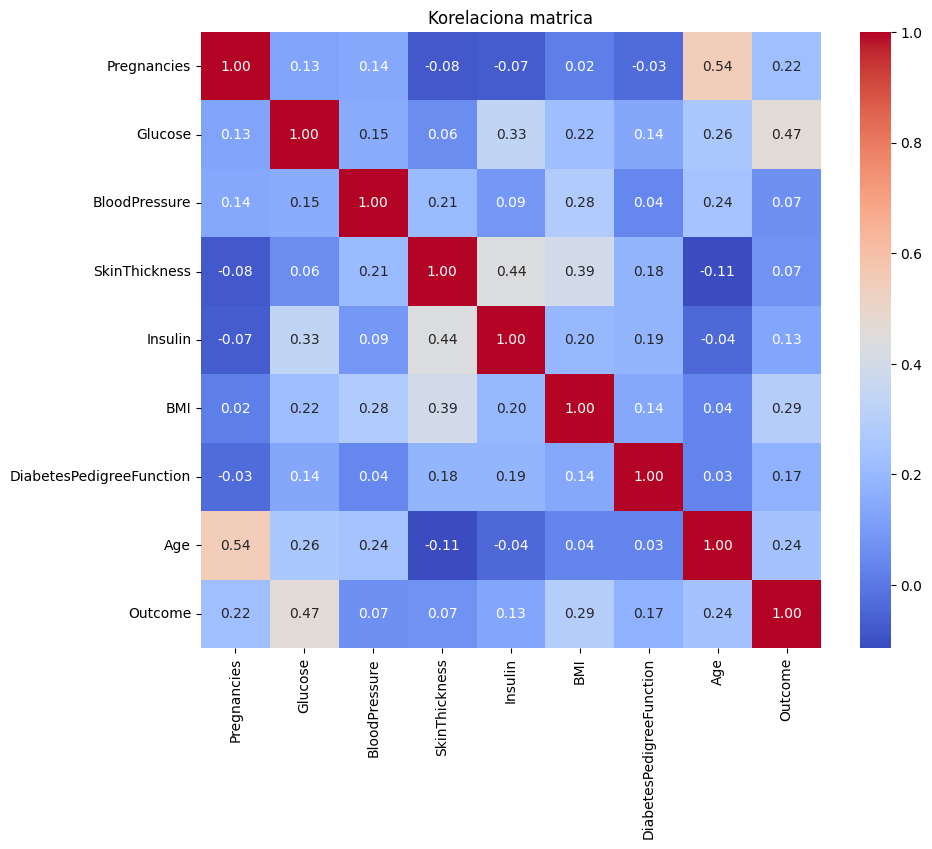

In [35]:
# matrica konfuzije: Možete koristiti matricu konfuzije da bismo videli kako su sve osobine međusobno korelisane. Ovo može biti korisno za identifikaciju veza između različitih osobina.
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelaciona matrica')
plt.show()
